In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('./u.data',sep='\t')

In [89]:
df

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116
...,...,...,...,...
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156


In [90]:
columns = ['user_id','item_id','rating','timestamp']

In [91]:
df.columns=columns

In [92]:
df

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116
...,...,...,...,...
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156


In [93]:
df.head()

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
sns.set_style('darkgrid')

In [96]:
movie_titles = pd.read_csv("./movie_id_titles")

In [97]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [98]:
df = pd.merge(df,movie_titles,on='item_id')

In [99]:
avg_rating = df.groupby('title')['rating'].mean()

In [100]:
ratings = df.groupby('title')['rating'].count()

In [101]:
ratings_df = pd.DataFrame(avg_rating)

In [102]:
ratings_df['Number of ratings'] = ratings

In [103]:
ratings_df.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


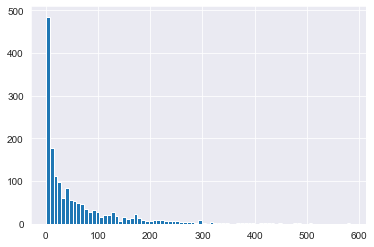

In [104]:
ratings_df['Number of ratings'].hist(bins=80)

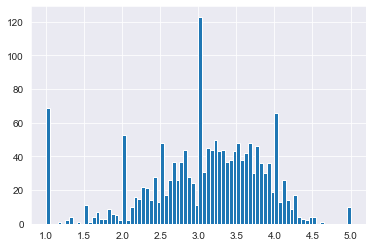

In [105]:
ratings_df['rating'].hist(bins=80)

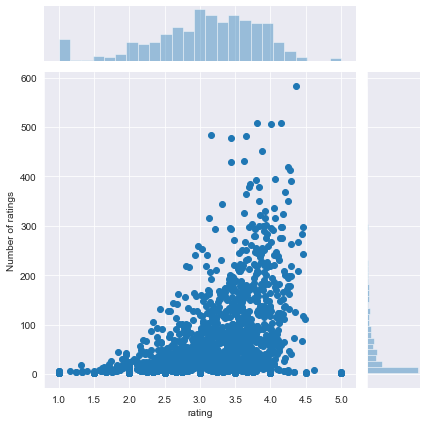

In [106]:
sns.jointplot(x='rating',y='Number of ratings',data=ratings_df)

In [107]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [108]:
moviematrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [109]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
ratings_df.sort_values('Number of ratings',ascending=False)

,rating,Number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [111]:
starwars_user_ratings = moviematrix['Star Wars (1977)']

In [112]:
starwars_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [113]:
similar_to_starwars = moviematrix.corrwith(starwars_user_ratings)

/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [114]:
pd.DataFrame(similar_to_starwars,columns=['Correlation'])

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [119]:
def get_recommened_movies(moviename):
    similarratings = moviematrix[str(moviename)]
    recommendations = pd.DataFrame(moviematrix.corrwith(similarratings),columns=['Correlation'])
    corr = recommendations.join(ratings_df['Number of ratings'])
    
    return corr[corr['Number of ratings']>100].sort_values('Correlation',ascending=False).head()
    #return corr

In [120]:
get_recommened_movies('Liar Liar (1997)')

/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
